In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


练习1

In [2]:
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


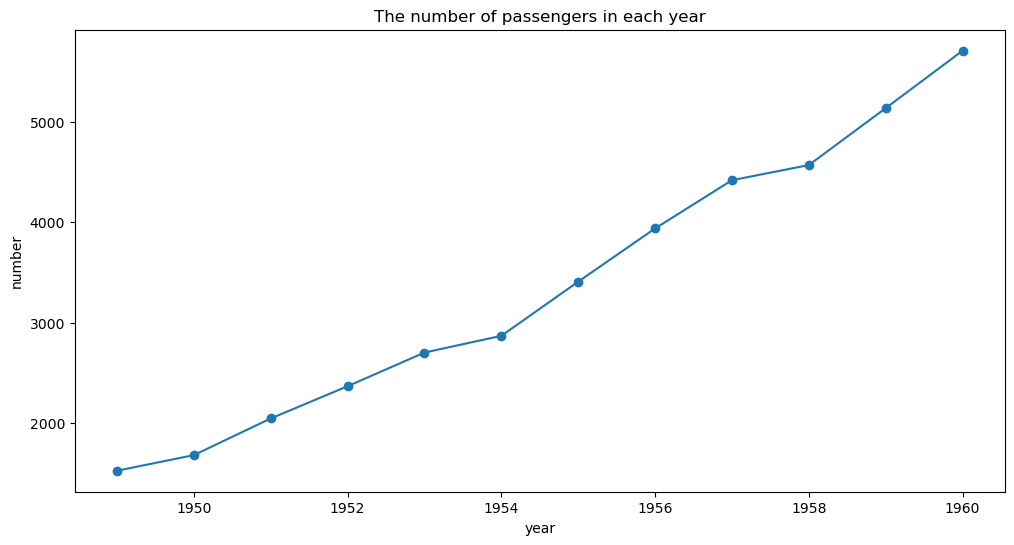

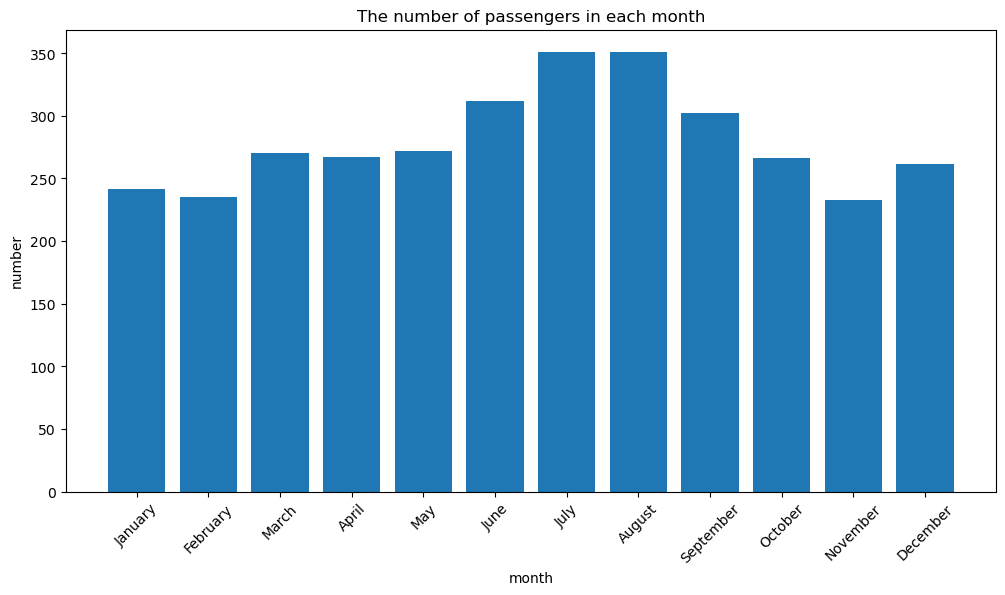

In [3]:
# 1. 分析年度乘客总量的变化情况（折线图）
# 按年份分组并计算每年的乘客总数
yearly_passengers = data.groupby('year')['passengers'].sum()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(yearly_passengers.index, yearly_passengers.values, marker='o')
plt.title('The number of passengers in each year')
plt.xlabel('year')
plt.ylabel('number')
#plt.grid(True)
plt.show()

# 2. 分析乘客量在一年中12个月份的分布（柱状图）
# 按月份分组并计算每个月的乘客平均数
monthly_passengers = data.groupby('month')['passengers'].mean()

# 由于月份是文本格式，为了让柱状图按自然月份顺序显示，可以对数据进行排序
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
monthly_passengers = monthly_passengers.reindex(months_order)

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(monthly_passengers.index, monthly_passengers.values)
plt.title('The number of passengers in each month')
plt.xlabel('month')
plt.ylabel('number')
plt.xticks(rotation=45)  # 旋转x轴标签以便清晰显示
plt.show()

练习2

In [4]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


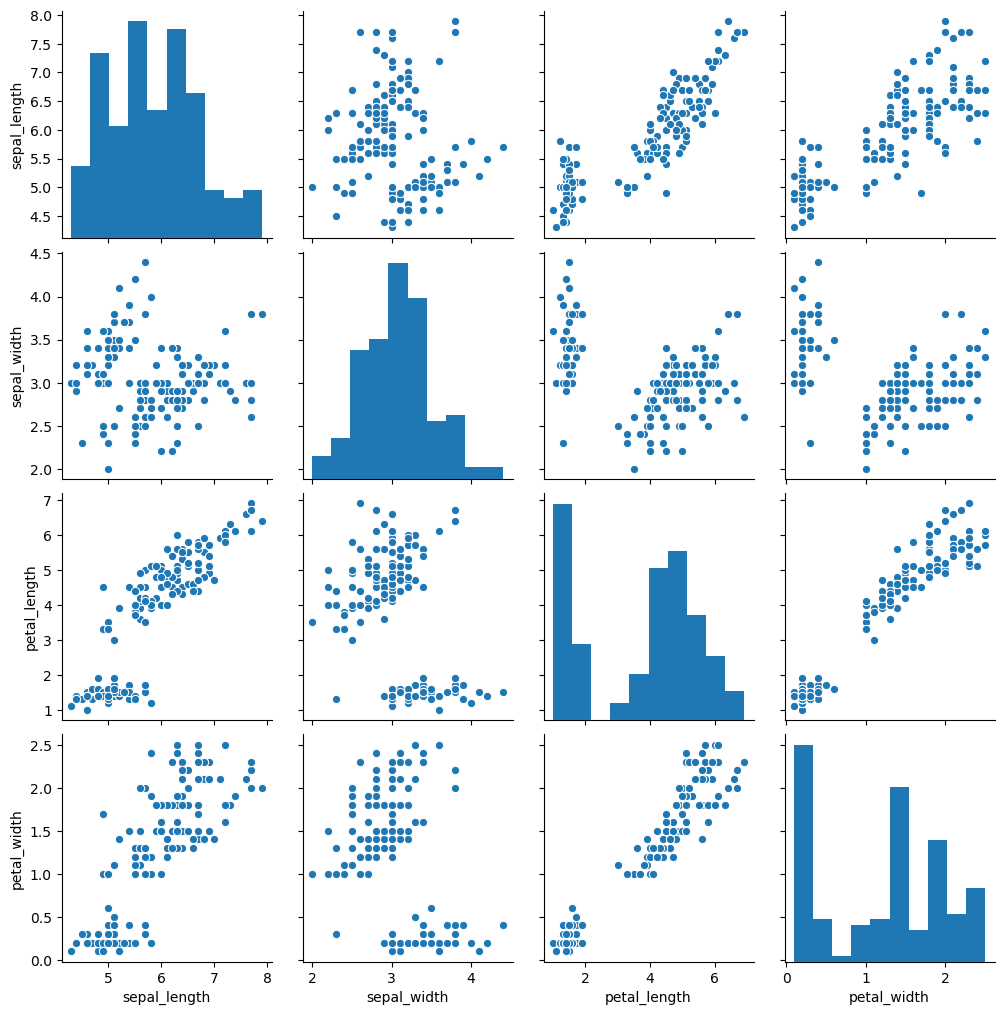

In [5]:
# 创建一个散点图矩阵
sns.pairplot(data, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()


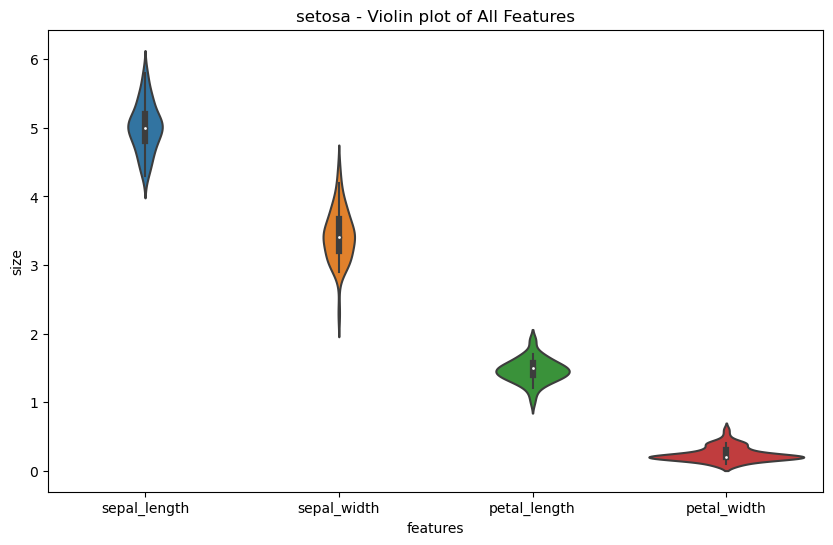

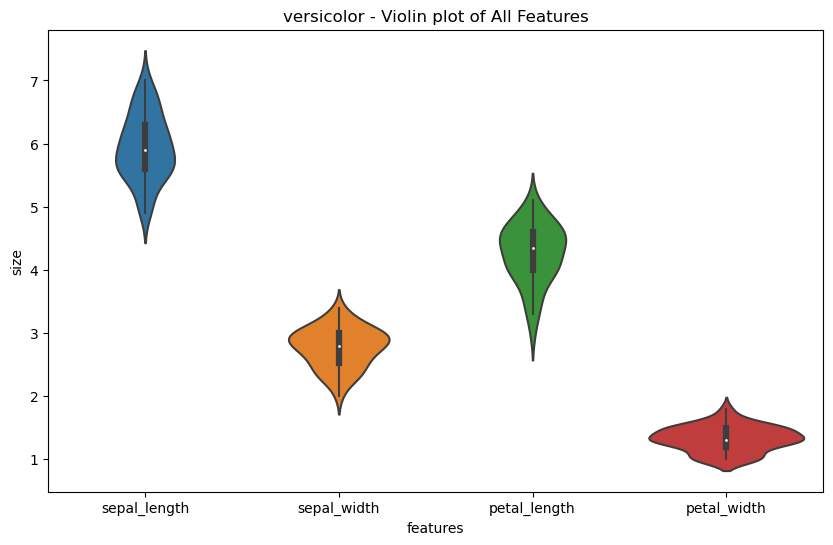

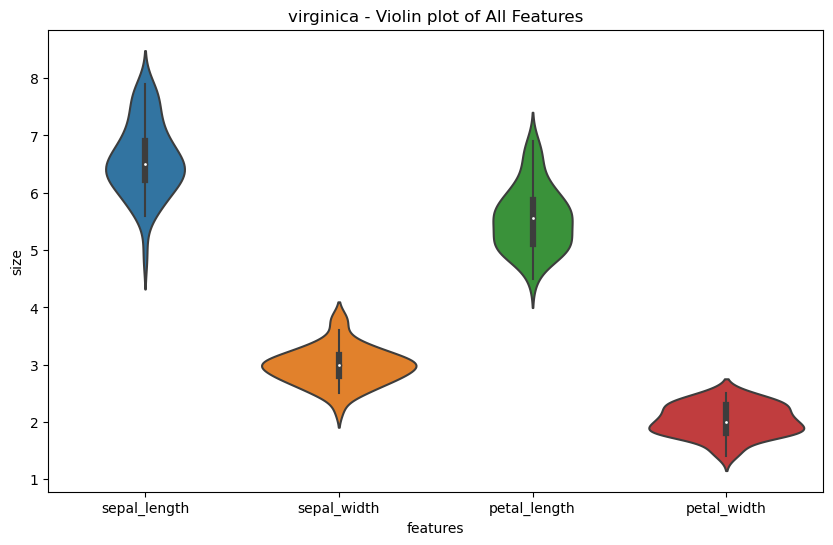

In [6]:
# 为每个种类绘制提琴图
for species in data['species'].unique():
    # 准备数据：将数据从宽格式转换为长格式
    data_long = pd.melt(data[data['species'] == species], 
                        id_vars='species', 
                        var_name='features', 
                        value_name='size')
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='features', y='size', data=data_long)
    plt.title(f'{species} - Violin plot of All Features')
    plt.show()




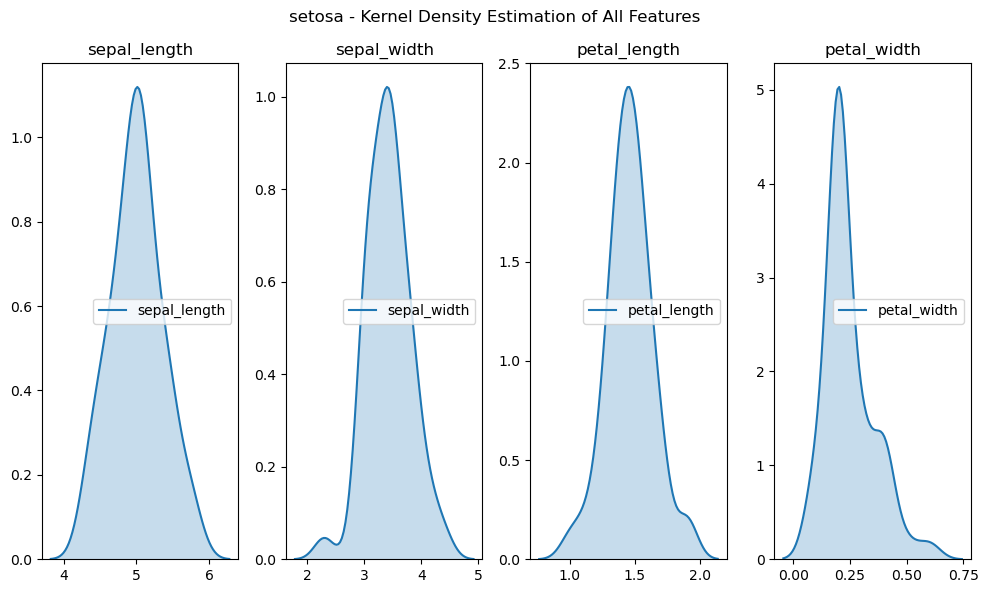

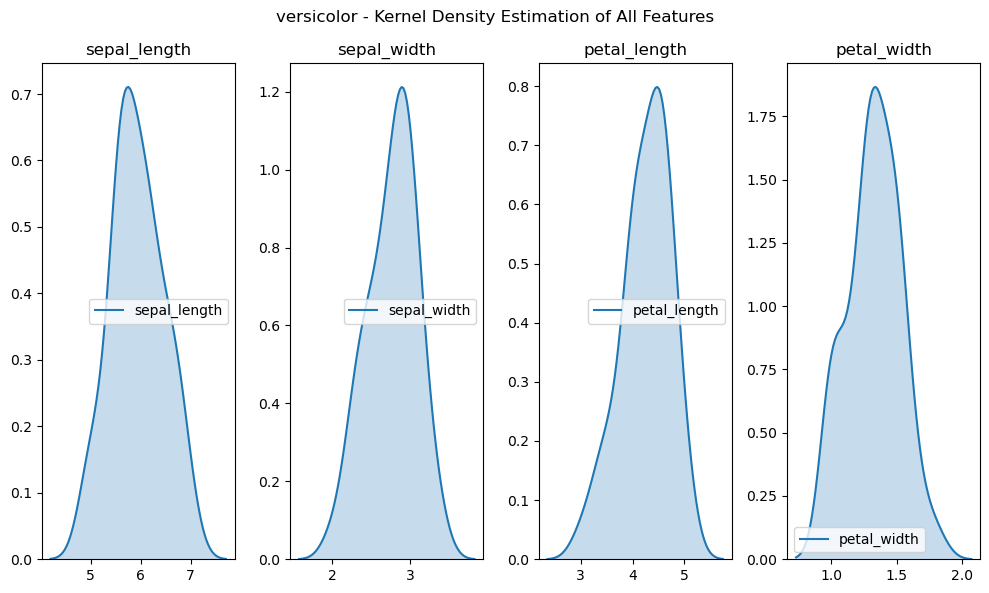

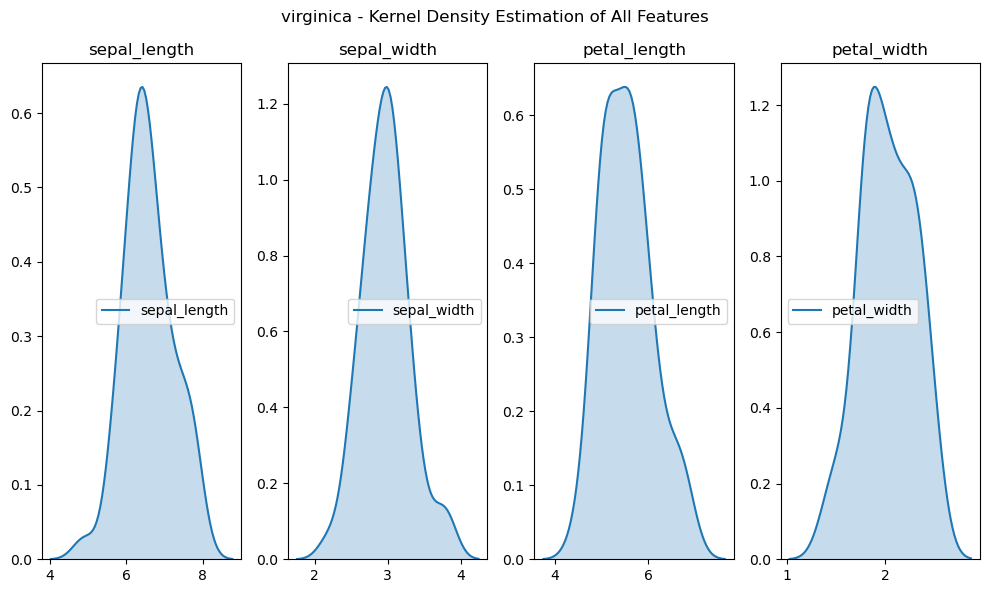

In [9]:
# 核密度估计 - 每个种类的四个特征
for species in data['species'].unique():
    plt.figure(figsize=(10, 6))
    plt.suptitle(f'{species} - Kernel Density Estimation of All Features')
    for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
        plt.subplot(1, 4, i+1)
        sns.kdeplot(data[feature][data['species'] == species], shade=True)
        plt.title(feature)
    plt.tight_layout()
    plt.show()



练习3

In [2]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


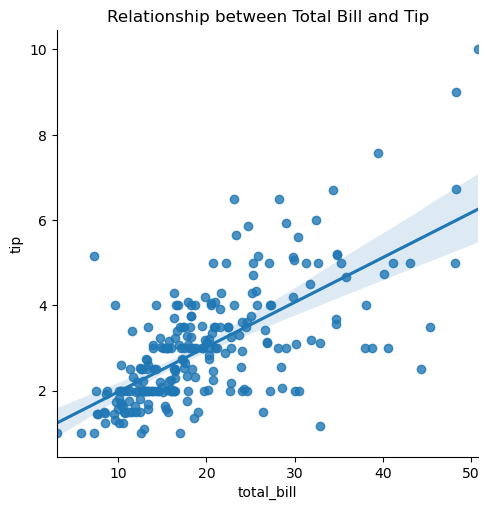

In [3]:
sns.lmplot(x='total_bill', y='tip', data=data)
plt.title('Relationship between Total Bill and Tip')
plt.show()


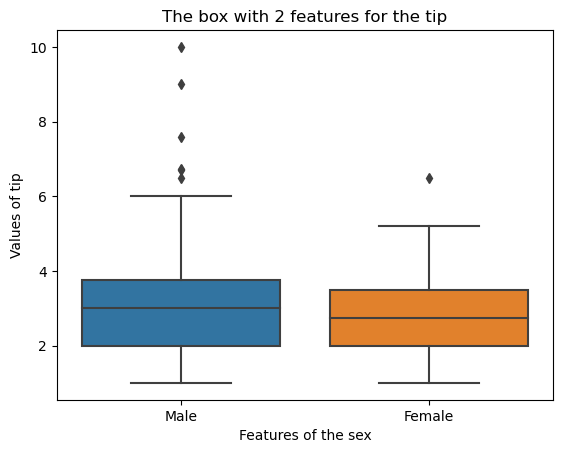

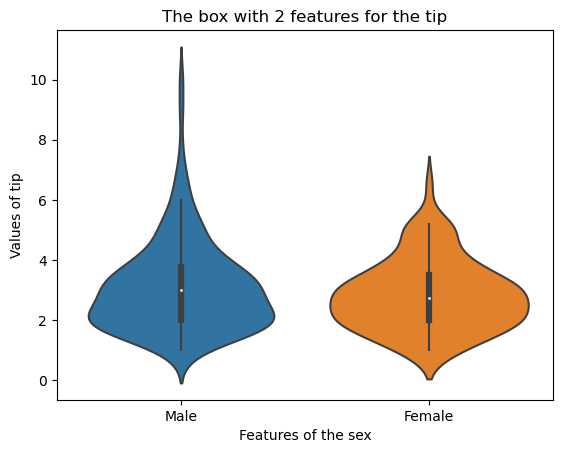

In [9]:
sns.boxplot(x='sex', y='tip', data=data)
plt.xlabel('Features of the sex')
plt.ylabel('Values of tip')
plt.title('The box with 2 features for the tip')
plt.show()

# 或者提琴图
sns.violinplot(x='sex', y='tip', data=data)
plt.xlabel('Features of the sex')
plt.ylabel('Values of tip')
plt.title('The box with 2 features for the tip')
plt.show()


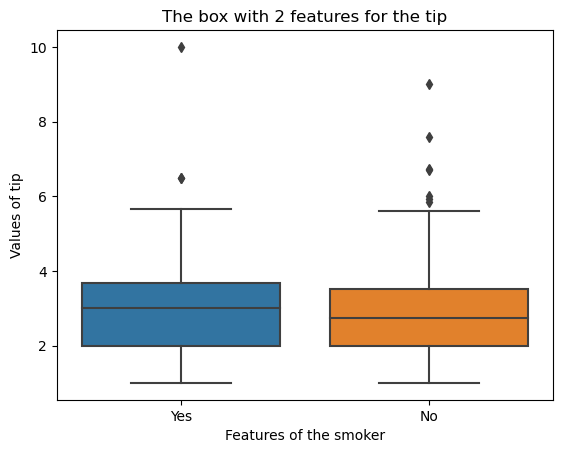

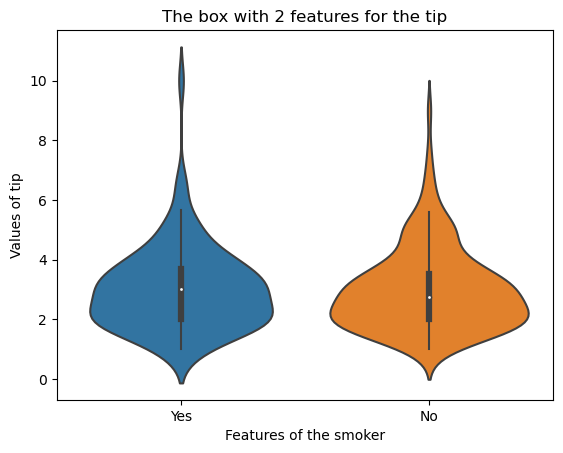

In [11]:
sns.boxplot(x='smoker', y='tip', data=data)
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the smoker')
plt.ylabel('Values of tip')
plt.show()

# 或者提琴图
sns.violinplot(x='smoker', y='tip', data=data)
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the smoker')
plt.ylabel('Values of tip')
plt.show()


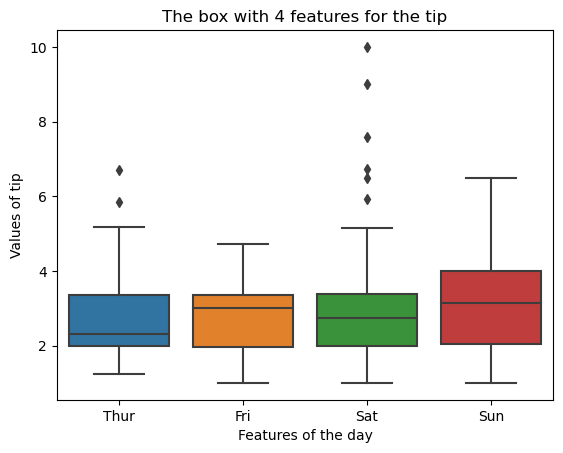

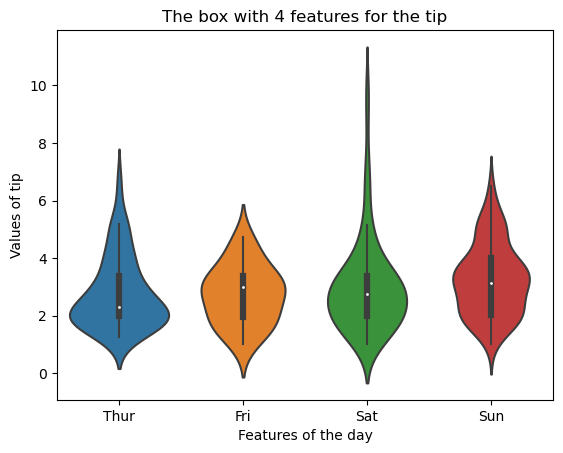

In [14]:
sns.boxplot(x='day', y='tip', data=data)
plt.title('The box with 4 features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

# 或者提琴图
sns.violinplot(x='day', y='tip', data=data)
plt.title('The box with 4 features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()


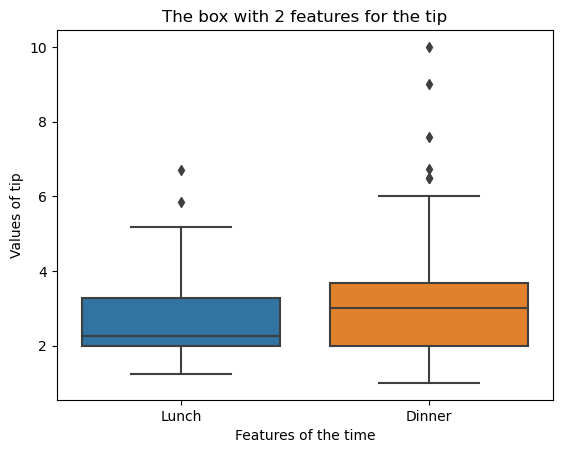

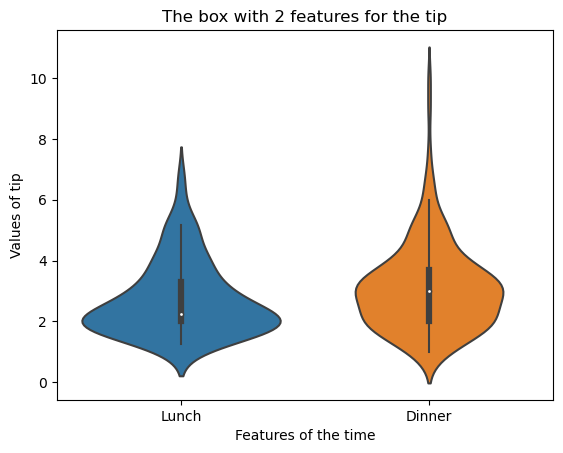

In [17]:
sns.boxplot(x='time', y='tip', data=data)
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the time')
plt.ylabel('Values of tip')
plt.show()

# 或者提琴图
sns.violinplot(x='time', y='tip', data=data)
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the time')
plt.ylabel('Values of tip')
plt.show()


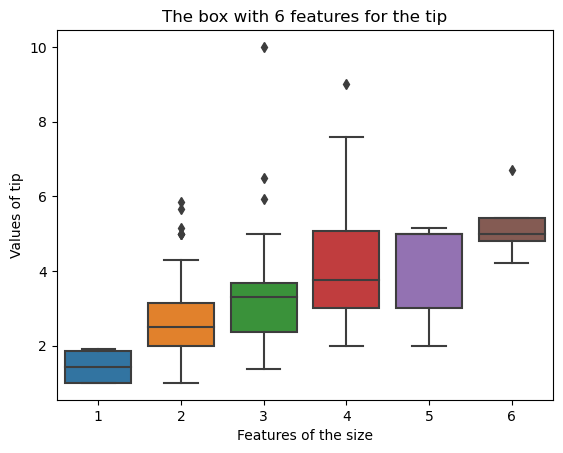

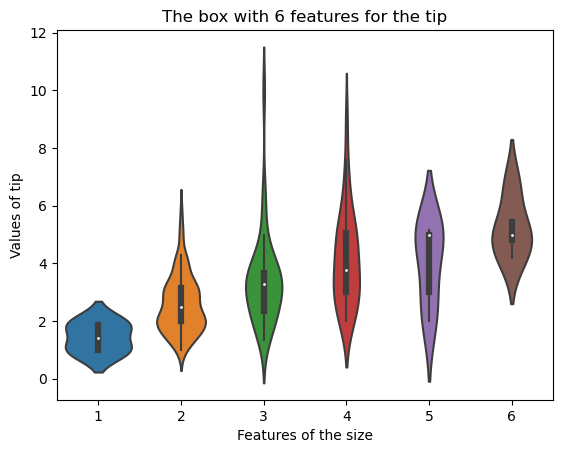

In [19]:
sns.boxplot(x='size', y='tip', data=data)
plt.title('The box with 6 features for the tip')
plt.xlabel('Features of the size')
plt.ylabel('Values of tip')
plt.show()

# 或者提琴图
sns.violinplot(x='size', y='tip', data=data)
plt.title('The box with 6 features for the tip')
plt.xlabel('Features of the size')
plt.ylabel('Values of tip')
plt.show()


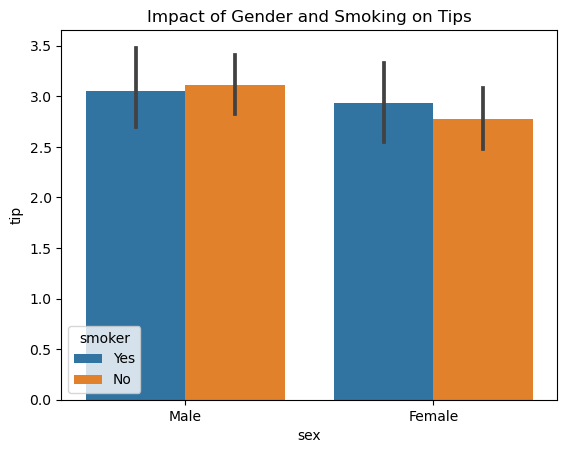

In [20]:
sns.barplot(x='sex', y='tip', hue='smoker', data=data)
plt.title('Value by Sex (Male or Female) and Smoker(Yes or No)')
plt.show()


练习4

In [21]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


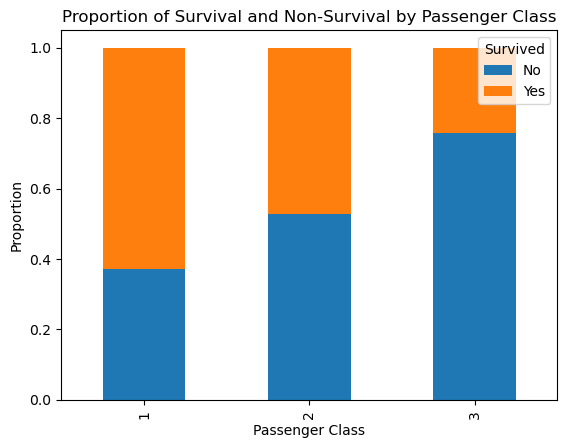

In [24]:
# 计算每个Pclass中幸存和遇难的比例
pclass_survived = data.groupby(['pclass', 'survived']).size().unstack()
pclass_survived = pclass_survived.div(pclass_survived.sum(axis=1), axis=0)

# 绘制堆叠的条形图
pclass_survived.plot(kind='bar', stacked=True)
plt.title('Proportion of survived/unsurvived by Pcalss')
plt.xlabel('Passenger Class')
plt.ylabel('Proportion of survived/unsurvived')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

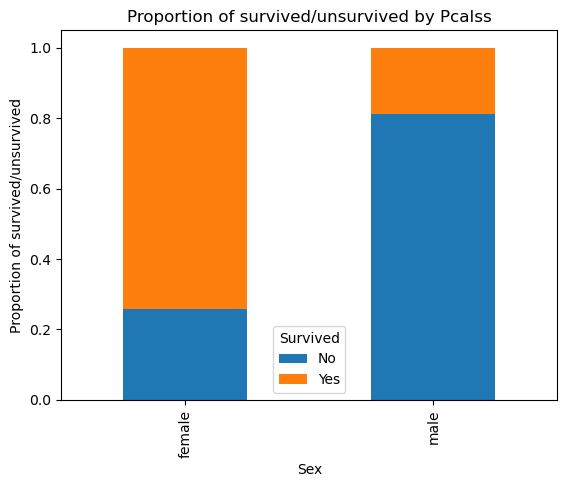

In [27]:
# 计算每个性别中幸存和遇难的比例
sex_survived = data.groupby(['sex', 'survived']).size().unstack()
sex_survived = sex_survived.div(sex_survived.sum(axis=1), axis=0)

# 绘制堆叠的条形图
sex_survived.plot(kind='bar', stacked=True)
plt.title('Proportion of survived/unsurvived by Pcalss')
plt.xlabel('Sex')
plt.ylabel('Proportion of survived/unsurvived')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


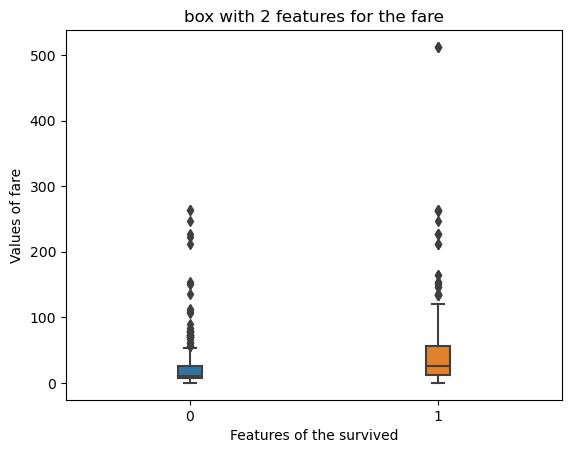

In [34]:
sns.boxplot(x='survived', y='fare', data=data,width=0.1)
plt.xlabel('Features of the survived')
plt.ylabel('Values of fare')
plt.title('box with 2 features for the fare')
plt.show()


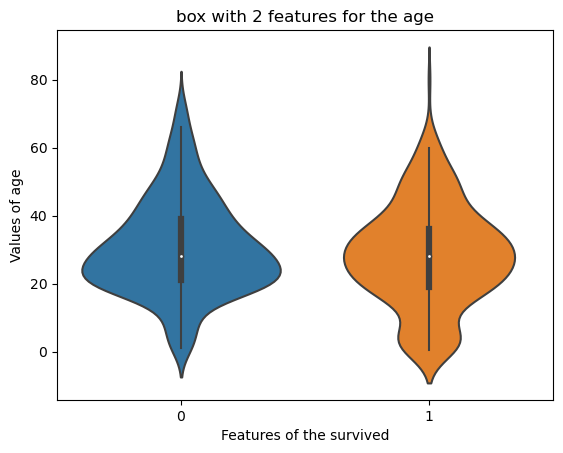

In [31]:
sns.violinplot(x='survived', y='age', data=data)
plt.xlabel('Features of the survived')
plt.ylabel('Values of age')
plt.title('box with 2 features for the age')
plt.show()


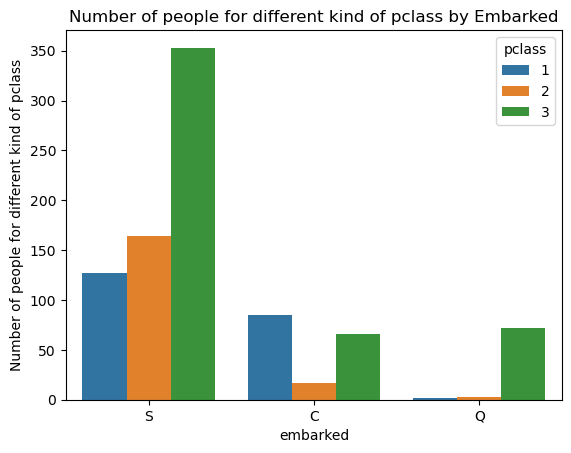

In [39]:
sns.countplot(x='embarked', hue='pclass', data=data)
plt.title('Number of people for different kind of pclass by Embarked')
plt.ylabel('Number of people for different kind of pclass')
plt.show()


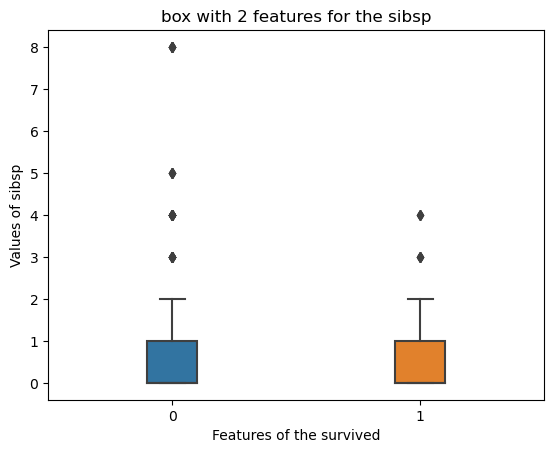

In [43]:
sns.boxplot(x='survived', y='sibsp', data=data,width=0.2)
plt.title('box with 2 features for the sibsp')
plt.ylabel('Values of sibsp')
plt.xlabel('Features of the survived')
plt.show()


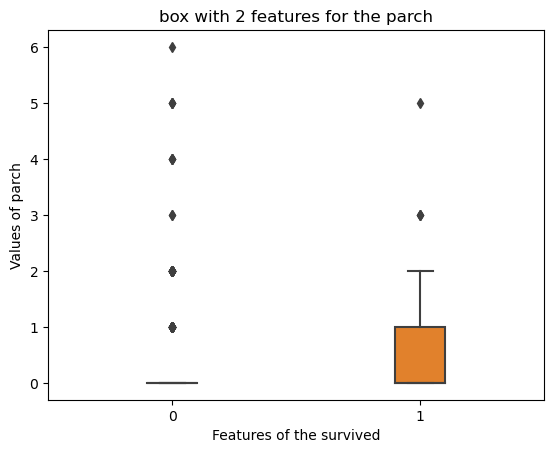

In [45]:
sns.boxplot(x='survived', y='parch', data=data,width=0.2)
plt.title('box with 2 features for the parch')
plt.ylabel('Values of parch')
plt.xlabel('Features of the survived')
plt.show()

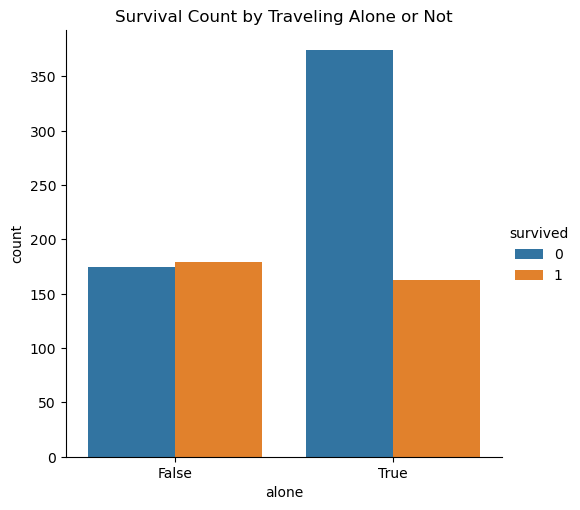

In [46]:
sns.catplot(x='alone', hue='survived', kind='count', data=data)
plt.title('The number of people by whether be survived or alone or not')
plt.ylabel('The number of people')
plt.show()
